In [ ]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../utils')
import helpers as h
import feature_engineering as f

load c:\Users\Frede\.conda\envs\env_learning_driver_preferences\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\Frede\.conda\envs\env_learning_driver_preferences\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\Frede\.conda\envs\env_learning_driver_preferences\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\Frede\.conda\envs\env_learning_driver_preferences\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\Frede\.conda\envs\env_learning_driver_preferences\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\Frede\.conda\envs\env_learning_driver_preferences\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\Frede\.conda\envs\env_learning_driver_preferences\Lib\site-packages\ortools\.libs\ortools.dll...


In [2]:
ITM_DIR = os.path.join(os.getcwd(), '../data/intermediate')
request_df = pd.read_csv(os.path.join(ITM_DIR, 'clean_data.csv'))
driven_df = request_df.query('request_day_route_is_last==True')

C:\Users\Frede\AppData\Local\Temp\ipykernel_21948\4069580357.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  request_df = pd.read_csv(os.path.join(ITM_DIR, 'clean_data.csv'))


## see if centroids move on daily basis: 

In [3]:
driven_df

file_uuid configurationName     id  \
4        34f409b3-9f92-4720-9926-48ca1cbf6f90    CreateSequence    388   
5        34f409b3-9f92-4720-9926-48ca1cbf6f90    CreateSequence    390   
6        cb9638db-2817-4ccf-b226-7775c01793a8      EstimateTime  64869   
7        cb9638db-2817-4ccf-b226-7775c01793a8      EstimateTime  64947   
8        cb9638db-2817-4ccf-b226-7775c01793a8      EstimateTime  64971   
...                                       ...               ...    ...   
2120926  8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1      EstimateTime  63699   
2120927  8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1      EstimateTime  63698   
2120928  8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1      EstimateTime  63697   
2120929  8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1      EstimateTime  63696   
2120930  8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1      EstimateTime  63785   

              lat      long           start_time             end_time  \
4        0.572716  0.233306  2022-06-17T07:30:00  2022-06-17T23:59:00   
5        0.565826  0.221868  2022-06-17T08:00:00  2022-06-17T17:00:00   
6        0.650488  0.296025  2022-05-30T00:00:00  2022-05-30T12:00:00   
7        0.646361  0.297741  2022-05-30T00:00:00  2022-05-30T12:00:00   
8        0.645787  0.298443  2022-05-30T00:00:00  2022-05-30T12:00:00   
...           ...       ...                  ...                  ...   
2120926  0.480072  0.301707  2022-06-22T07:30:00  2022-06-22T23:59:00   
2120927  0.479680  0.301925  2022-06-22T07:30:00  2022-06-22T23:59:00   
2120928  0.479792  0.300703  2022-06-22T07:30:00  2022-06-22T23:59:00   
2120929  0.481527  0.300490  2022-06-22T07:30:00  2022-06-22T23:59:00   
2120930  0.483888  0.300764  2022-06-22T00:00:00  2022-06-22T23:59:00   

         server_task_number  stop_order                dir  ...  \
4                         2           1  0521_300-20220617  ...   
5                         1           2  0521_300-20220617  ...   
6                         1           1  0521_301-20220530  ...   
7                         2           2  0521_301-20220530  ...   
8                         3           3  0521_301-20220530  ...   
...                     ...         ...                ...  ...   
2120926                 135         135  0521_O69-20220622  ...   
2120927                 136         136  0521_O69-20220622  ...   
2120928                 137         137  0521_O69-20220622  ...   
2120929                 138         138  0521_O69-20220622  ...   
2120930                 139         139  0521_O69-20220622  ...   

                        Date                        Time  \
4        2022-06-17 00:00:00  1900-01-01 09:24:16.831000   
5        2022-06-17 00:00:00  1900-01-01 09:24:16.831000   
6        2022-05-30 00:00:00  1900-01-01 06:45:38.424000   
7        2022-05-30 00:00:00  1900-01-01 06:45:38.424000   
8        2022-05-30 00:00:00  1900-01-01 06:45:38.424000   
...                      ...                         ...   
2120926  2022-06-22 00:00:00  1900-01-01 08:38:33.987000   
2120927  2022-06-22 00:00:00  1900-01-01 08:38:33.987000   
2120928  2022-06-22 00:00:00  1900-01-01 08:38:33.987000   
2120929  2022-06-22 00:00:00  1900-01-01 08:38:33.987000   
2120930  2022-06-22 00:00:00  1900-01-01 08:38:33.987000   

                        OptimizationRequestId   RouteId       TriggerType  \
4        34f409b3-9f92-4720-9926-48ca1cbf6f90  0521_300  FullOptimization   
5        34f409b3-9f92-4720-9926-48ca1cbf6f90  0521_300  FullOptimization   
6        cb9638db-2817-4ccf-b226-7775c01793a8  0521_301   TimeCalculation   
7        cb9638db-2817-4ccf-b226-7775c01793a8  0521_301   TimeCalculation   
8        cb9638db-2817-4ccf-b226-7775c01793a8  0521_301   TimeCalculation   
...                                       ...       ...               ...   
2120926  8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1  0521_O69   TimeCalculation   
2120927  8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1  0521_O69   TimeCalculation   
2120928  8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1  0521

In [4]:
driven_df.route_id.nunique()

232

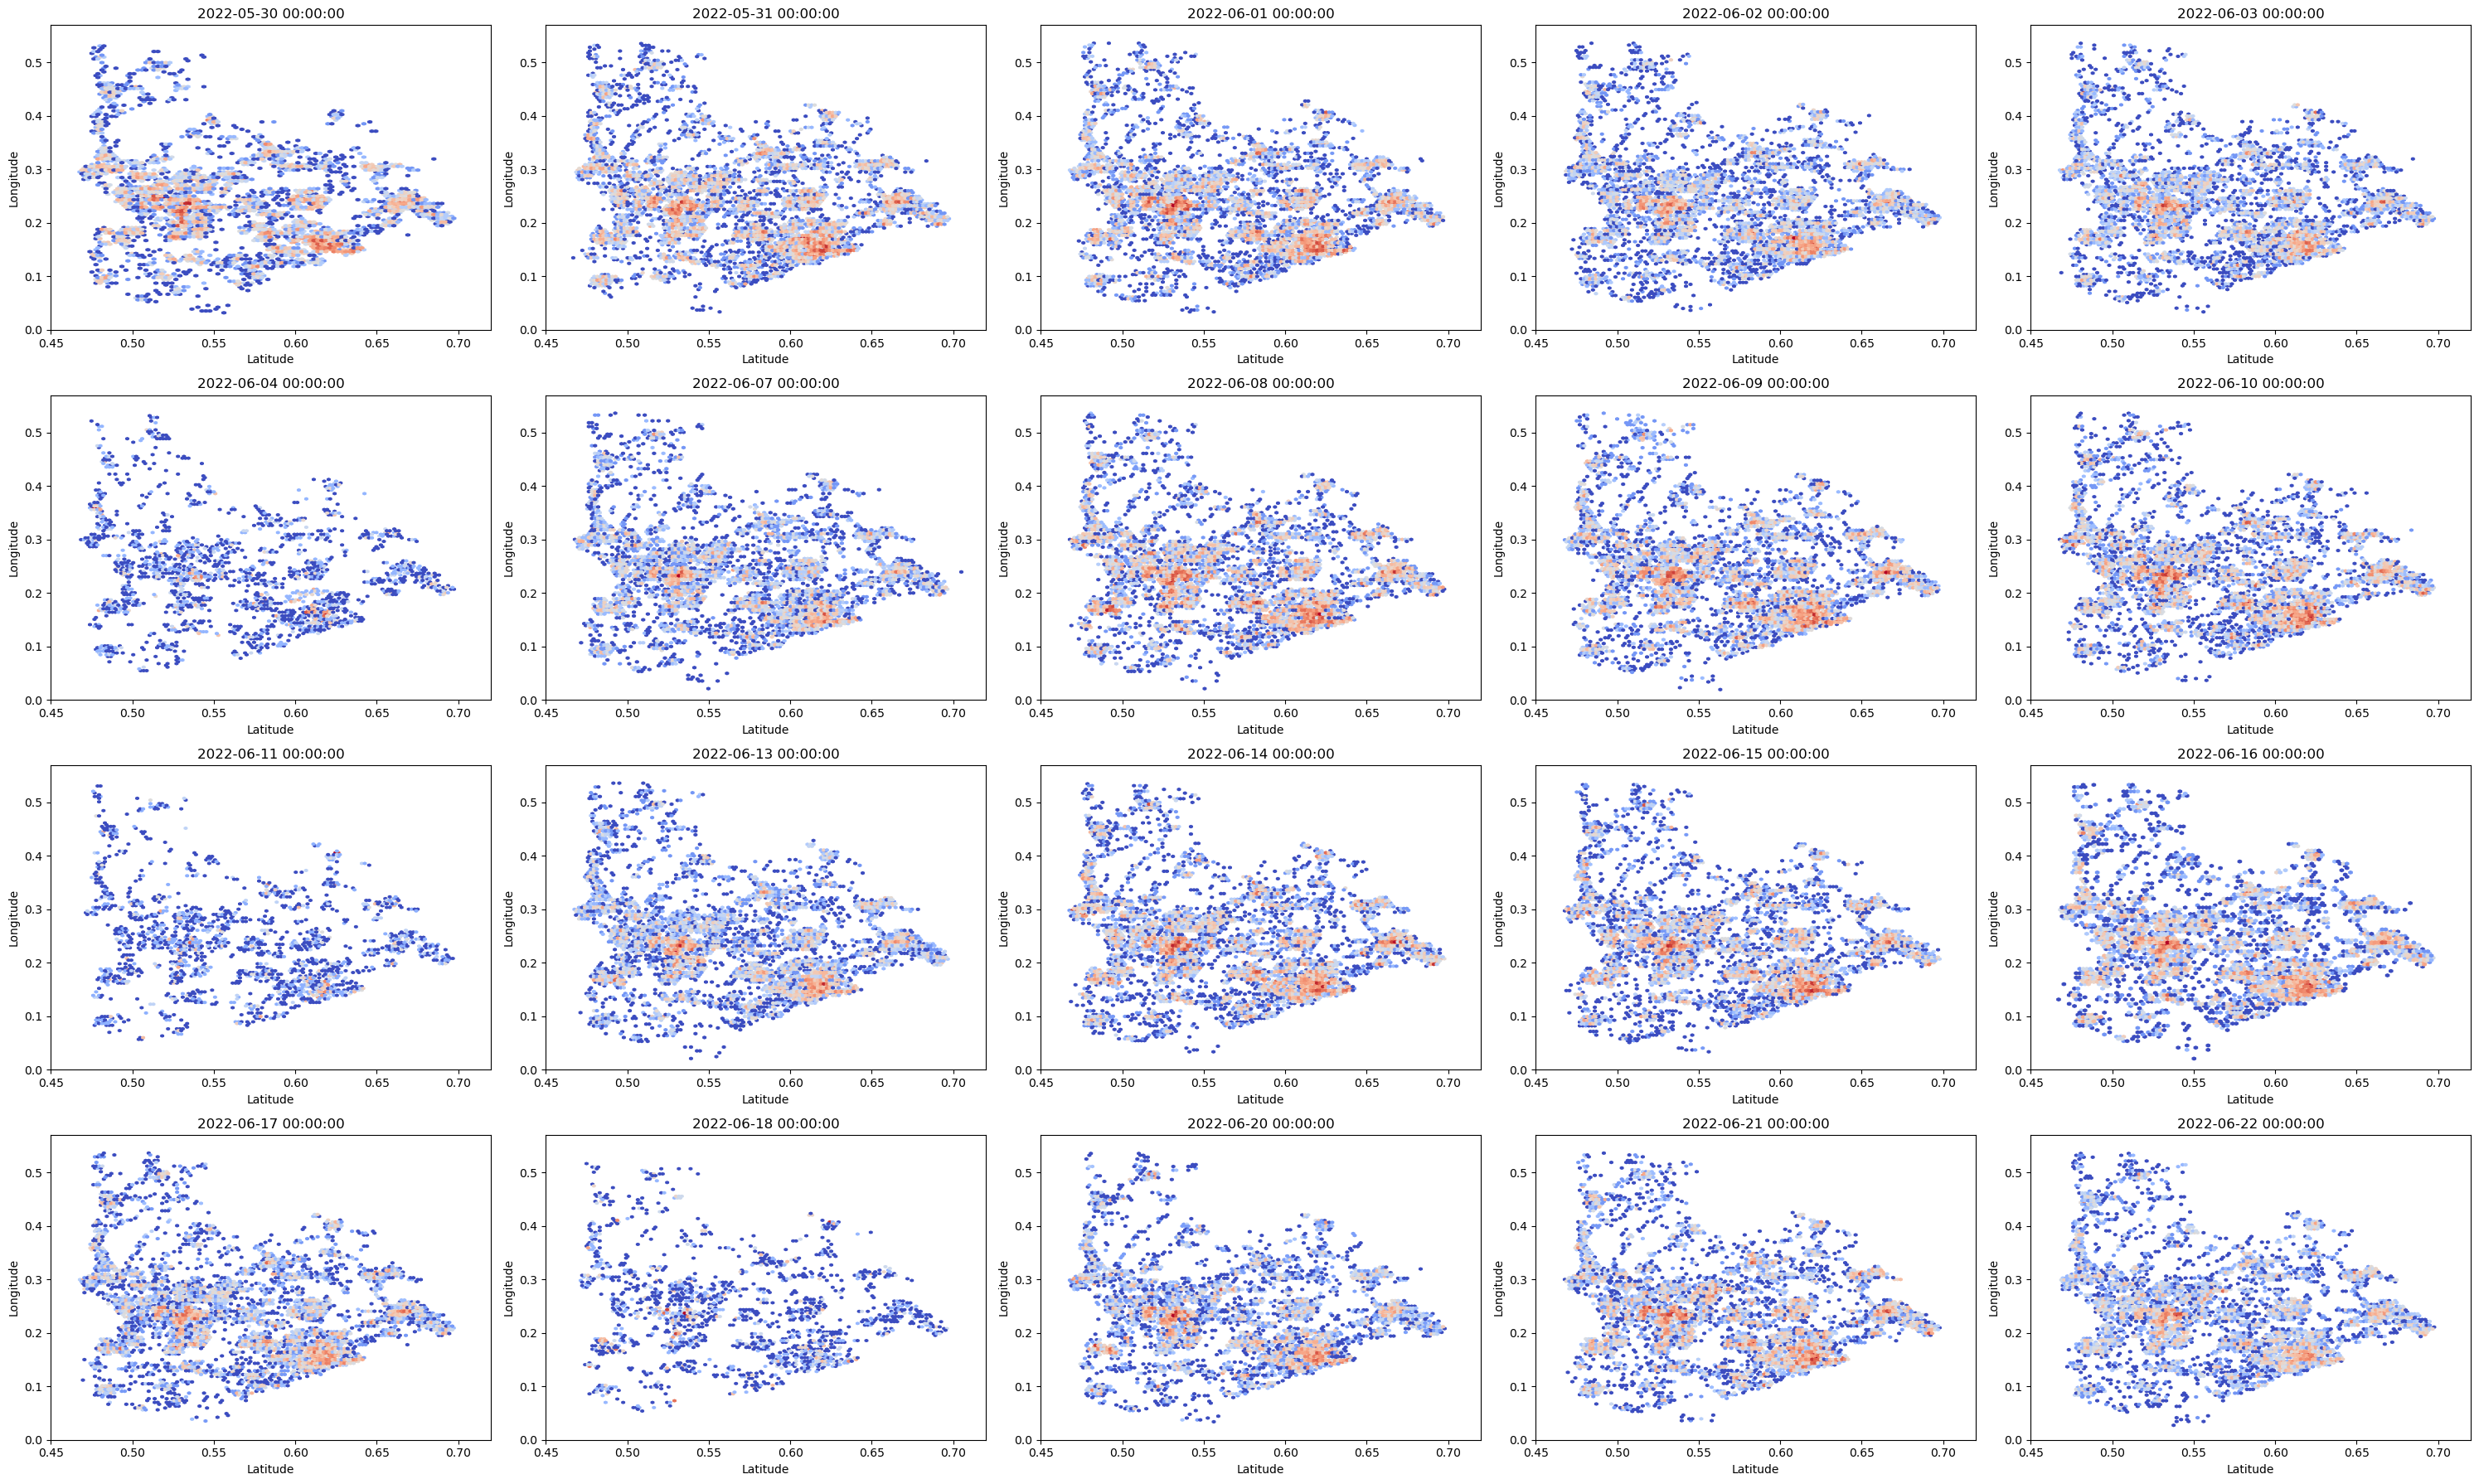

In [5]:
gs = 125


driven_df_sorted = driven_df.sort_values('Date')
unique_dates = sorted(driven_df_sorted['Date'].unique())

fig, axs = plt.subplots(4, 5, figsize=(30, 18))
axs = axs.flatten()
for i, day in enumerate(unique_dates):
    df = driven_df_sorted[driven_df_sorted['Date'] == day]
    ax = axs[i]
    ax.hexbin(df['lat'], df['long'], gridsize=gs, cmap="coolwarm", bins="log")
    ax.set_xlim(0.45, 0.72)
    ax.set_ylim(0, 0.57)
    ax.set_title(str(day))  # Convert date to string if needed
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.grid(False)

plt.tight_layout()

In [6]:
clustered_df = []
for i, day in enumerate(unique_dates):
    df = driven_df_sorted[driven_df_sorted['Date'] == day].copy()
    available_cars = df.route_id.nunique()
    points = list(zip(df['lat'], df['long']))
    clusters = h.cluster_points(points, available_cars)
    km_clusters = h.cluster_kmeans(points, available_cars)
    df['clusterid_agg'] = clusters
    df['cluster_km'] = km_clusters
    clustered_df.append(df)    
clustered_df = pd.concat(clustered_df)

In [7]:
#points are now assigned to routes see how imbalanced these routes are
for day, df in clustered_df.groupby('Date'): 
    print(day, df.clusterid_agg.value_counts().min(), df.clusterid_agg.value_counts().max(), df.clusterid_agg.value_counts().mean())
    print(day, df.cluster_km.value_counts().min(), df.cluster_km.value_counts().max(), df.cluster_km.value_counts().mean())

#Cancel agglomerative and KNN clustering - too many stops per route, this is unpractical and unbalanced. 

2022-05-30 00:00:00 1 11142 118.64233576642336
2022-05-30 00:00:00 2 346 118.64233576642336
2022-05-31 00:00:00 1 18670 134.07853403141362
2022-05-31 00:00:00 8 371 134.07853403141362
2022-06-01 00:00:00 1 19101 122.109375
2022-06-01 00:00:00 11 285 122.109375
2022-06-02 00:00:00 1 15431 111.77604166666667
2022-06-02 00:00:00 8 258 111.77604166666667
2022-06-03 00:00:00 1 8767 102.97883597883597
2022-06-03 00:00:00 7 302 102.97883597883597
2022-06-04 00:00:00 1 2510 55.19047619047619
2022-06-04 00:00:00 5 133 55.19047619047619
2022-06-07 00:00:00 1 6876 93.2784090909091
2022-06-07 00:00:00 8 265 93.2784090909091
2022-06-08 00:00:00 1 9270 128.71808510638297
2022-06-08 00:00:00 7 293 128.71808510638297
2022-06-09 00:00:00 1 19395 125.28648648648648
2022-06-09 00:00:00 10 345 125.28648648648648
2022-06-10 00:00:00 1 8256 117.31413612565446
2022-06-10 00:00:00 7 328 117.31413612565446
2022-06-11 00:00:00 1 903 45.58904109589041
2022-06-11 00:00:00 8 121 45.58904109589041
2022-06-13 00:00:

## MULTI STEP CLUSTERING: Unattended

In [8]:
driven_df.Date.unique()

array(['2022-06-17 00:00:00', '2022-05-30 00:00:00',
       '2022-05-31 00:00:00', '2022-06-01 00:00:00',
       '2022-06-02 00:00:00', '2022-06-03 00:00:00',
       '2022-06-07 00:00:00', '2022-06-08 00:00:00',
       '2022-06-09 00:00:00', '2022-06-10 00:00:00',
       '2022-06-13 00:00:00', '2022-06-14 00:00:00',
       '2022-06-15 00:00:00', '2022-06-16 00:00:00',
       '2022-06-18 00:00:00', '2022-06-20 00:00:00',
       '2022-06-21 00:00:00', '2022-06-22 00:00:00',
       '2022-06-11 00:00:00', '2022-06-04 00:00:00'], dtype=object)

In [9]:
# CONFIG FOR MULTISTEP CLUSTERING: 
day = '2022-06-21 00:00:00'     #what day do you want to make a cluster attempt for?

maxroutes = driven_df.query('Date == @day').route_id.nunique()                  #how many cars are available (we take routecount from driven_df for Date == day)
maxstops = max(driven_df.query('Date == @day').route_id.value_counts())         #how many stops are maximum allowed per route?

In [10]:
df = driven_df.query('Date == @day')
points = list(zip(df['lat'], df['long']))

In [11]:
partitionsize = 20
partitions = h.partition(points, partitionsize)
print(len(partitions))

2048


In [12]:
partitiondata = {}
i = 1
for p in partitions: 
    pdata = {
        'partitionId': i,
        'count': len(p), 
        'partition_points': p, 
        'partition_center': h.calculate_centroid(p)
    }
    partitiondata[i] = pdata
    i+=1


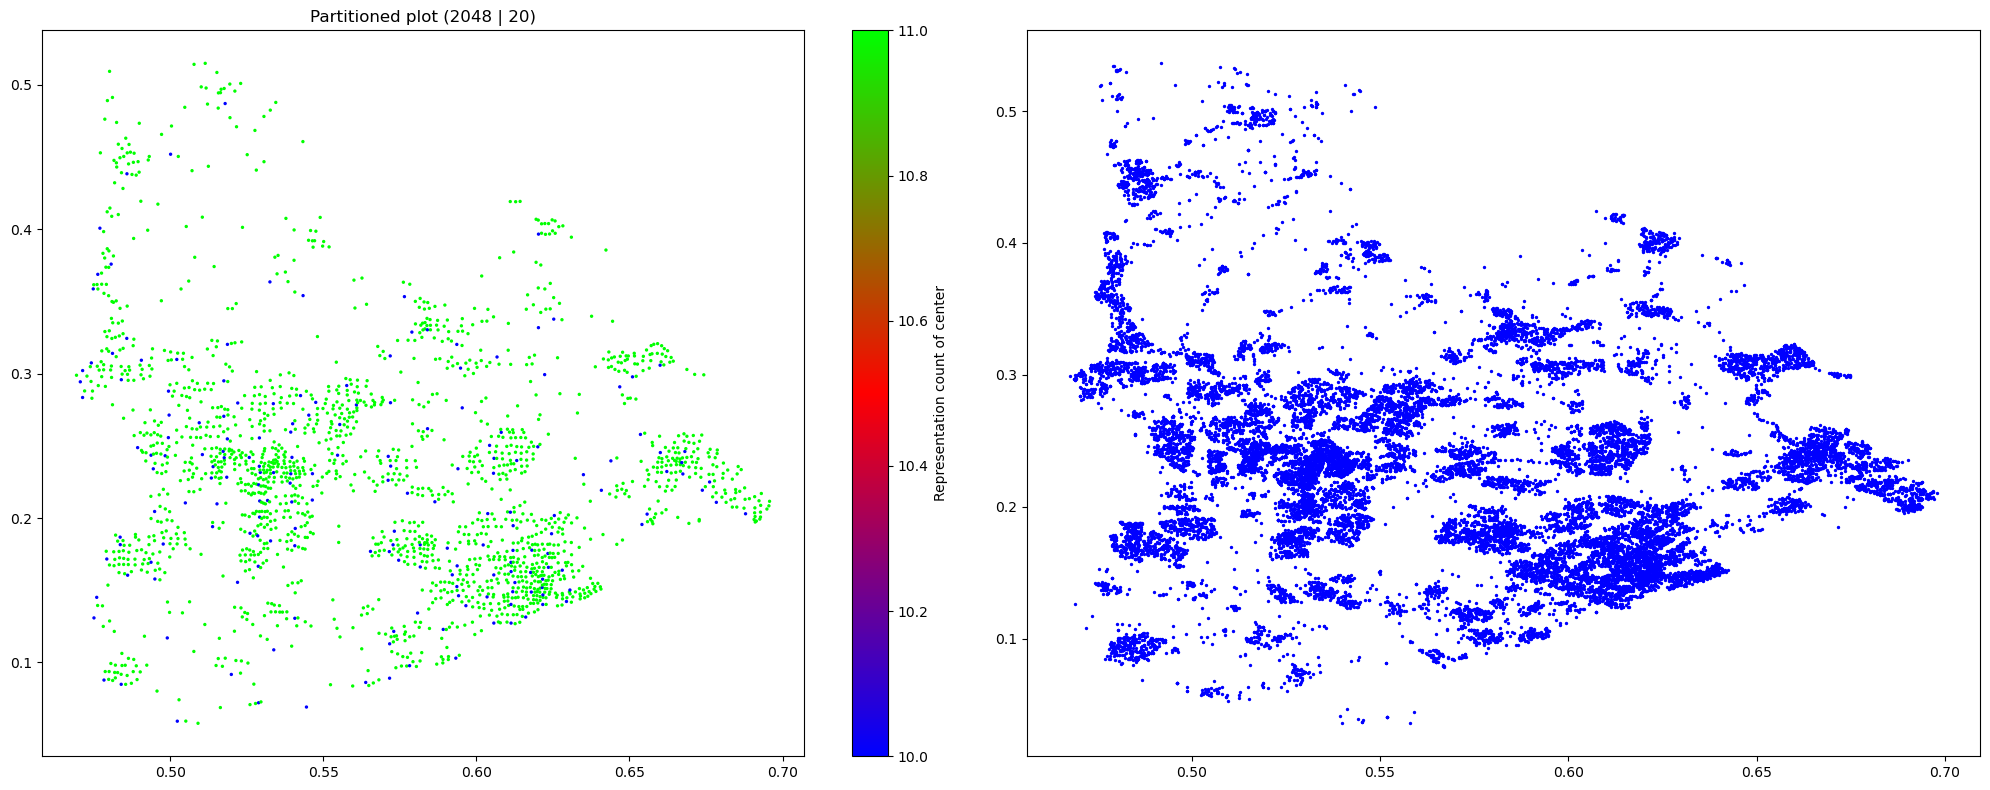

In [13]:
h.plot_centra_vs_full(partitiondata, df, partitionsize)

In [15]:

shrunken_partitions = h.merge_partitions(partitiondata, max_stops_per_route=maxstops, max_clusters = maxroutes)

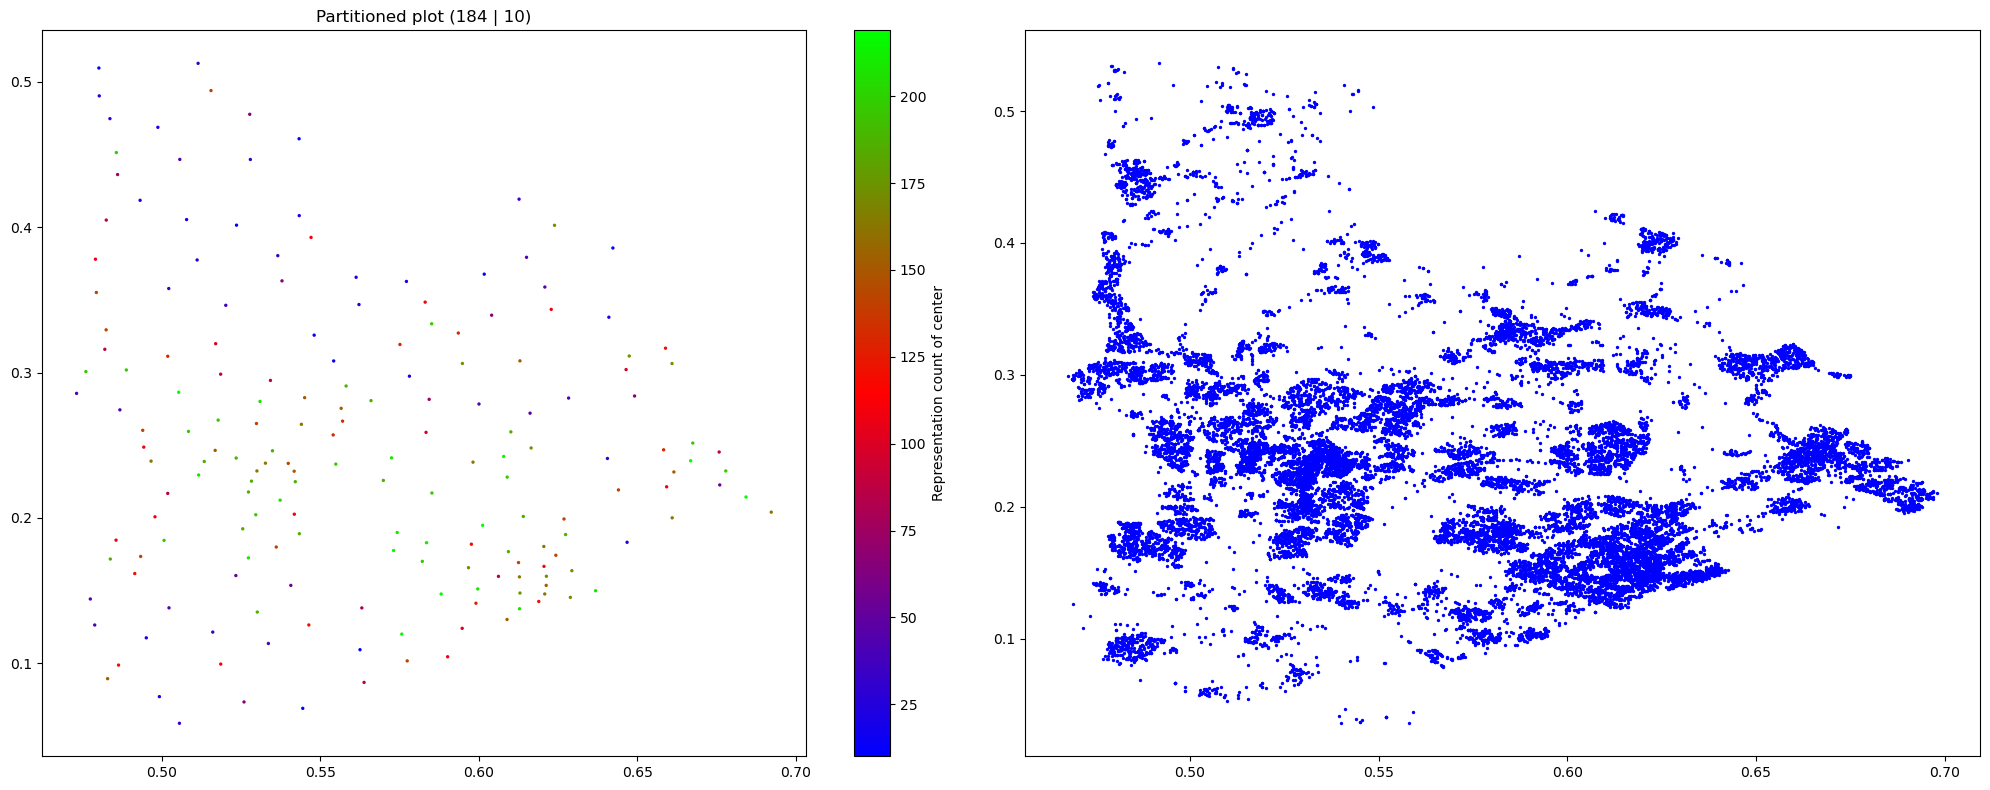

In [16]:
h.plot_centra_vs_full(shrunken_partitions, df, 10)


In [18]:
# Print the result
shrunken_partition_distances = {}



for partition_id, partition_data in shrunken_partitions.items():
    print(f"Partition ID: {partition_id}, Count: {partition_data['count']}, Center: {partition_data['partition_center']}")
    distance, route = h.solve_tsp(partition_data['partition_points'])
    shrunken_partition_distances[partition_id] = distance

print(len(shrunken_partitions))


Partition ID: 321, Count: 10, Center: (0.5445076072549873, 0.0690886766596018)
Partition ID: 339, Count: 11, Center: (0.5625616490258253, 0.1094104911116735)
Partition ID: 688, Count: 11, Center: (0.4802047354698429, 0.5093752055423106)
Partition ID: 936, Count: 11, Center: (0.5236155761079038, 0.4013256850314127)
Partition ID: 994, Count: 11, Center: (0.5481008371261309, 0.3256923825729526)
Partition ID: 1000, Count: 11, Center: (0.554259822013024, 0.3079503572276996)
Partition ID: 1003, Count: 11, Center: (0.5433463695713672, 0.46073168806628123)
Partition ID: 1775, Count: 11, Center: (0.6017418845231308, 0.3676350079276461)
Partition ID: 1982, Count: 11, Center: (0.6423231758187835, 0.3856245352325637)
Partition ID: 1787, Count: 33, Center: (0.612729912655831, 0.4191975292879253)
Partition ID: 1707, Count: 22, Center: (0.5772093837497586, 0.3626364897667981)
Partition ID: 687, Count: 22, Center: (0.4803235220739723, 0.4902222990869861)
Partition ID: 1019, Count: 22, Center: (0.56133

In [19]:
distances_of_original_routes = {}

#df is the same day as the data we tried to optimze
for route_id, route_day_df in df.groupby('route_id'): 
    points = list(zip(route_day_df['lat'], route_day_df['long']))
    distance, route = h.solve_tsp(points)
    distances_of_original_routes[route_id] = distance
    

In [20]:
print("Original mean distances", np.mean(list(distances_of_original_routes.values())))
print("Optimized mean distances", np.mean(list(shrunken_partition_distances.values())))

Original mean distances 0.13325323556398655
Optimized mean distances 0.14579095560372674


C:\Users\Frede\AppData\Local\Temp\ipykernel_21948\4228067358.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Original Routes', 'Shrunken Partitions'], patch_artist=True)


Text(0.5, 1.0, 'Euclidian distances according to unoptimized TSP solver')

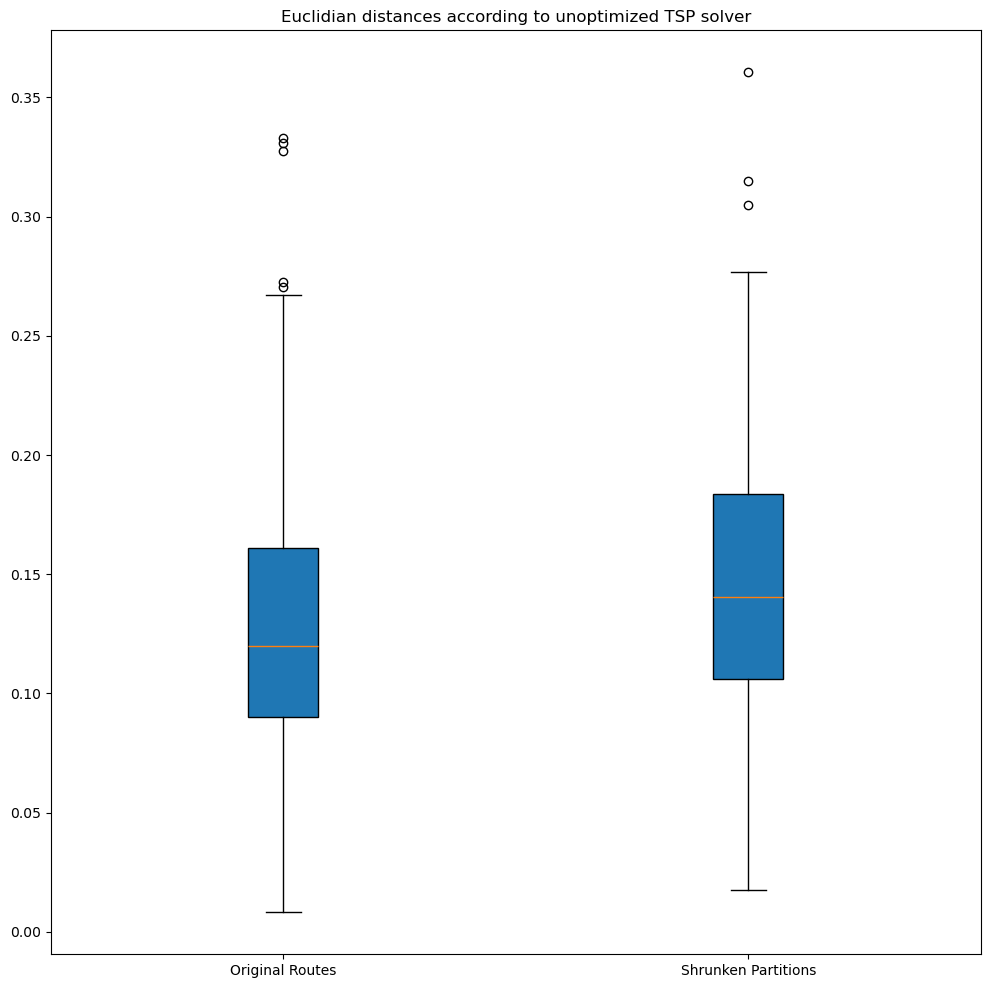

In [21]:
data = [list(distances_of_original_routes.values()), list(shrunken_partition_distances.values())]

# Create the boxplot
plt.figure(figsize=(12, 12))
plt.boxplot(data, labels=['Original Routes', 'Shrunken Partitions'], patch_artist=True)

# Add title and labels
plt.title('Euclidian distances according to unoptimized TSP solver')

agglomerative clustering is just a bad idea; you get this kind of heavy imbalances. Kmeans ain't so bad. Iterative clustering is promissing. 